In [1]:
from HASS_data_detective import DataParser 
from helpers import load_url
%matplotlib inline

In [2]:
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = load_url(filename)

In [3]:
%%time
parser = DataParser(DB_URL)

/Users/robincole/Documents/Github/HASS-data-detective/HASS_data_detective.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sensors_df['state'] = sensors_df['state'].astype('float')


CPU times: user 6.08 s, sys: 1.48 s, total: 7.56 s
Wall time: 1min 19s


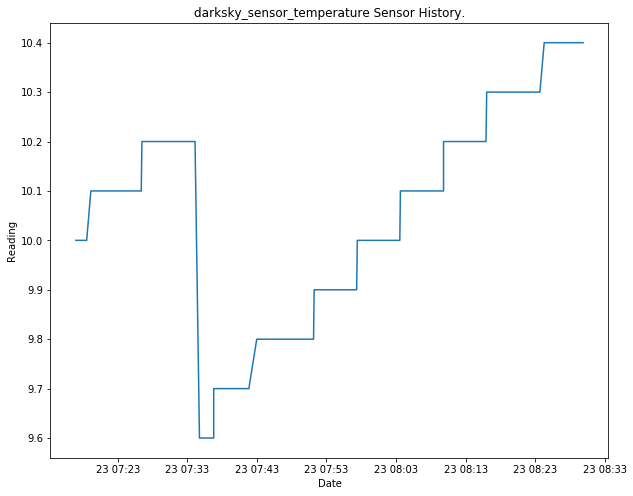

In [4]:
sensor = 'sensor.darksky_sensor_temperature'
parser.plot_sensor(sensor)